In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [55]:
data = pd.read_csv('diabetes.csv')

In [56]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

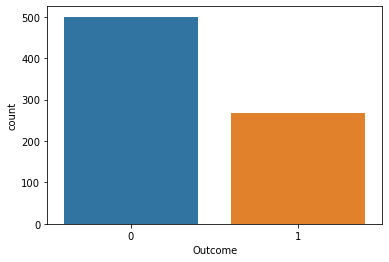

In [60]:
sns.countplot(x='Outcome', data=pima)

In [61]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [62]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25, random_state=0)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logreg.score(X_train, y_train)

0.75694444444444442

In [66]:
logreg.score(X_test, y_test)

0.80729166666666663

In [67]:
print("b0 = ",logreg.intercept_)
print("Coefs = ",logreg.coef_)

b0 =  [-5.45326815]
Coefs =  [[  8.34795715e-02   2.55633497e-02  -1.64912876e-02   5.59127992e-03
   -5.38538035e-04   5.43203966e-02   6.03448120e-01   1.23533515e-02]]


In [68]:
y_pred = logreg.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[119  11]
 [ 26  36]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.92      0.82      0.87       145
          1       0.58      0.77      0.66        47

avg / total       0.83      0.81      0.82       192



In [71]:
y_pred_proba = logreg.predict_proba(X_test)[: :,1]

In [72]:
from sklearn.metrics import accuracy_score
log_score = accuracy_score(y_test, y_pred)
print("Logistic_reg_class_SCORE = ",log_score)

Logistic_reg_class_SCORE =  0.807291666667


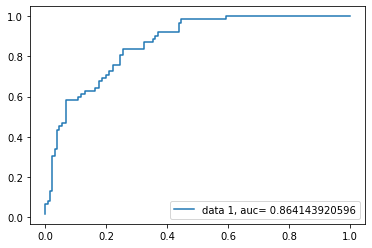

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,_ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = 'data 1, auc= '+str(auc))
plt.legend(loc=4)
plt.show()

# KNN Classification

In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [75]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [76]:
y_prediction = knn.predict(X_test)

In [77]:
y_prediction!=y_test

661    False
122    False
113    False
14     False
529    False
       ...  
366     True
301     True
382    False
140    False
463    False
Name: Outcome, Length: 192, dtype: bool

In [78]:
np.mean(y_prediction!=y_test)

0.22916666666666666

In [79]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

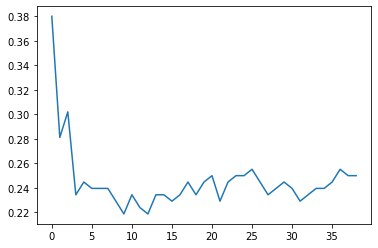

In [80]:
plt.plot(error_rate)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
confu_2 = confusion_matrix(y_test,y_prediction)
print(confu_2)

[[112  18]
 [ 26  36]]


In [82]:
print(classification_report(y_test,y_prediction))

             precision    recall  f1-score   support

          0       0.81      0.86      0.84       130
          1       0.67      0.58      0.62        62

avg / total       0.76      0.77      0.77       192



In [83]:
y_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
print("KNN_class_SCORE = ", knn_score)

KNN_class_SCORE =  0.807291666667


# Random Forest Classification

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)

In [85]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
y_rf_pred = rf.predict(X_test)

In [87]:
eval_model = rf.score(X_train, y_train)
print("random_forest_class_SCORE = ",eval_model)

random_forest_class_SCORE =  0.980902777778


In [88]:
from sklearn.metrics import confusion_matrix,classification_report
confu_3 = confusion_matrix(y_test,y_prediction)
print(confu_3)

[[116  14]
 [ 34  28]]


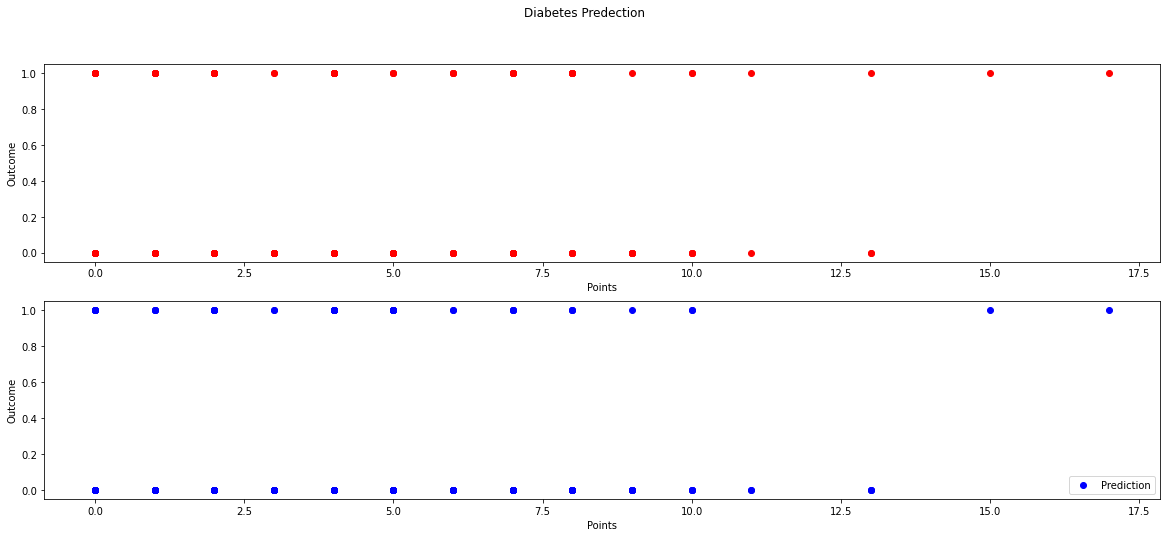

In [89]:
plt.rcParams["figure.figsize"] = (20,8)

fig,axs = plt.subplots(2)
fig.suptitle('Diabetes Predection')

ID = pima.iloc[:, 0:1].values
ID = pima.iloc[:len(y_test),0:1]

axs[0].scatter(ID, y_test, color = 'red', label = "Actual")
axs[1].scatter(ID, y_pred, color = 'blue', label = "Prediction")

for ax in axs.flat:
    ax.set(xlabel = 'Points', ylabel = 'Outcome')
    
plt.legend()
plt.show()